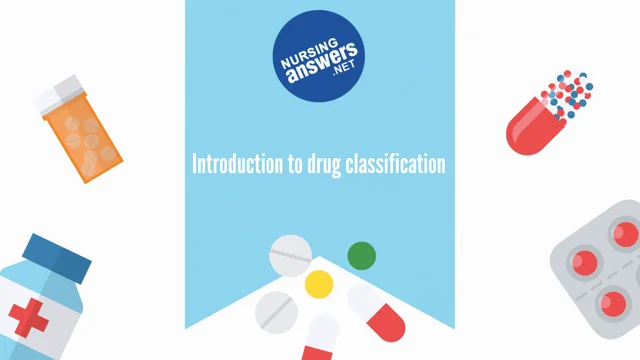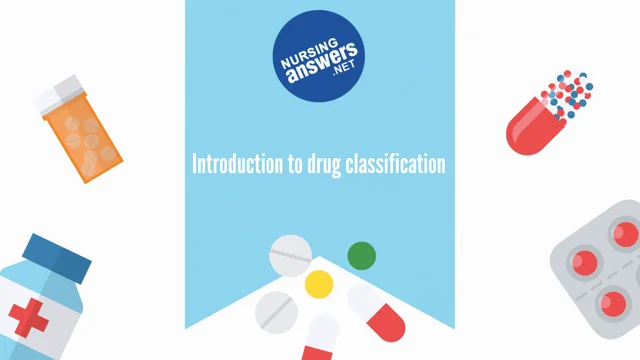

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette=None,rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

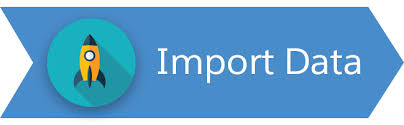

In [2]:
Drug_data=pd.read_csv("/kaggle/input/drug-classification/drug200.csv")
Drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


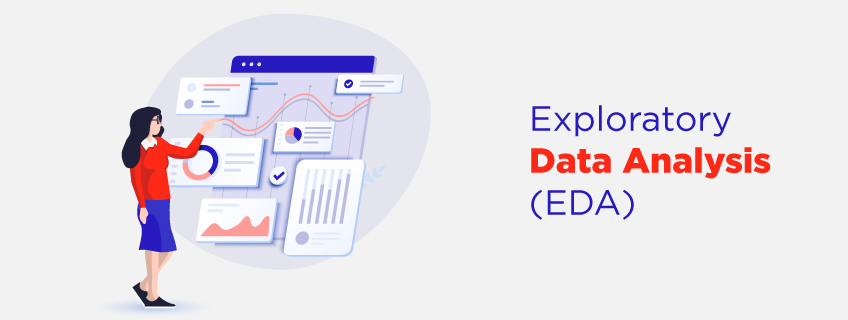

In [3]:
Drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
Drug_data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
Drug_data.sample(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
186,70,M,HIGH,HIGH,9.849,drugB
129,32,F,NORMAL,HIGH,7.477,drugX
52,62,M,LOW,NORMAL,27.183,DrugY


In [6]:
Drug_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [7]:
Drug_data.describe(include="object").T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,DrugY,91


In [8]:
Drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


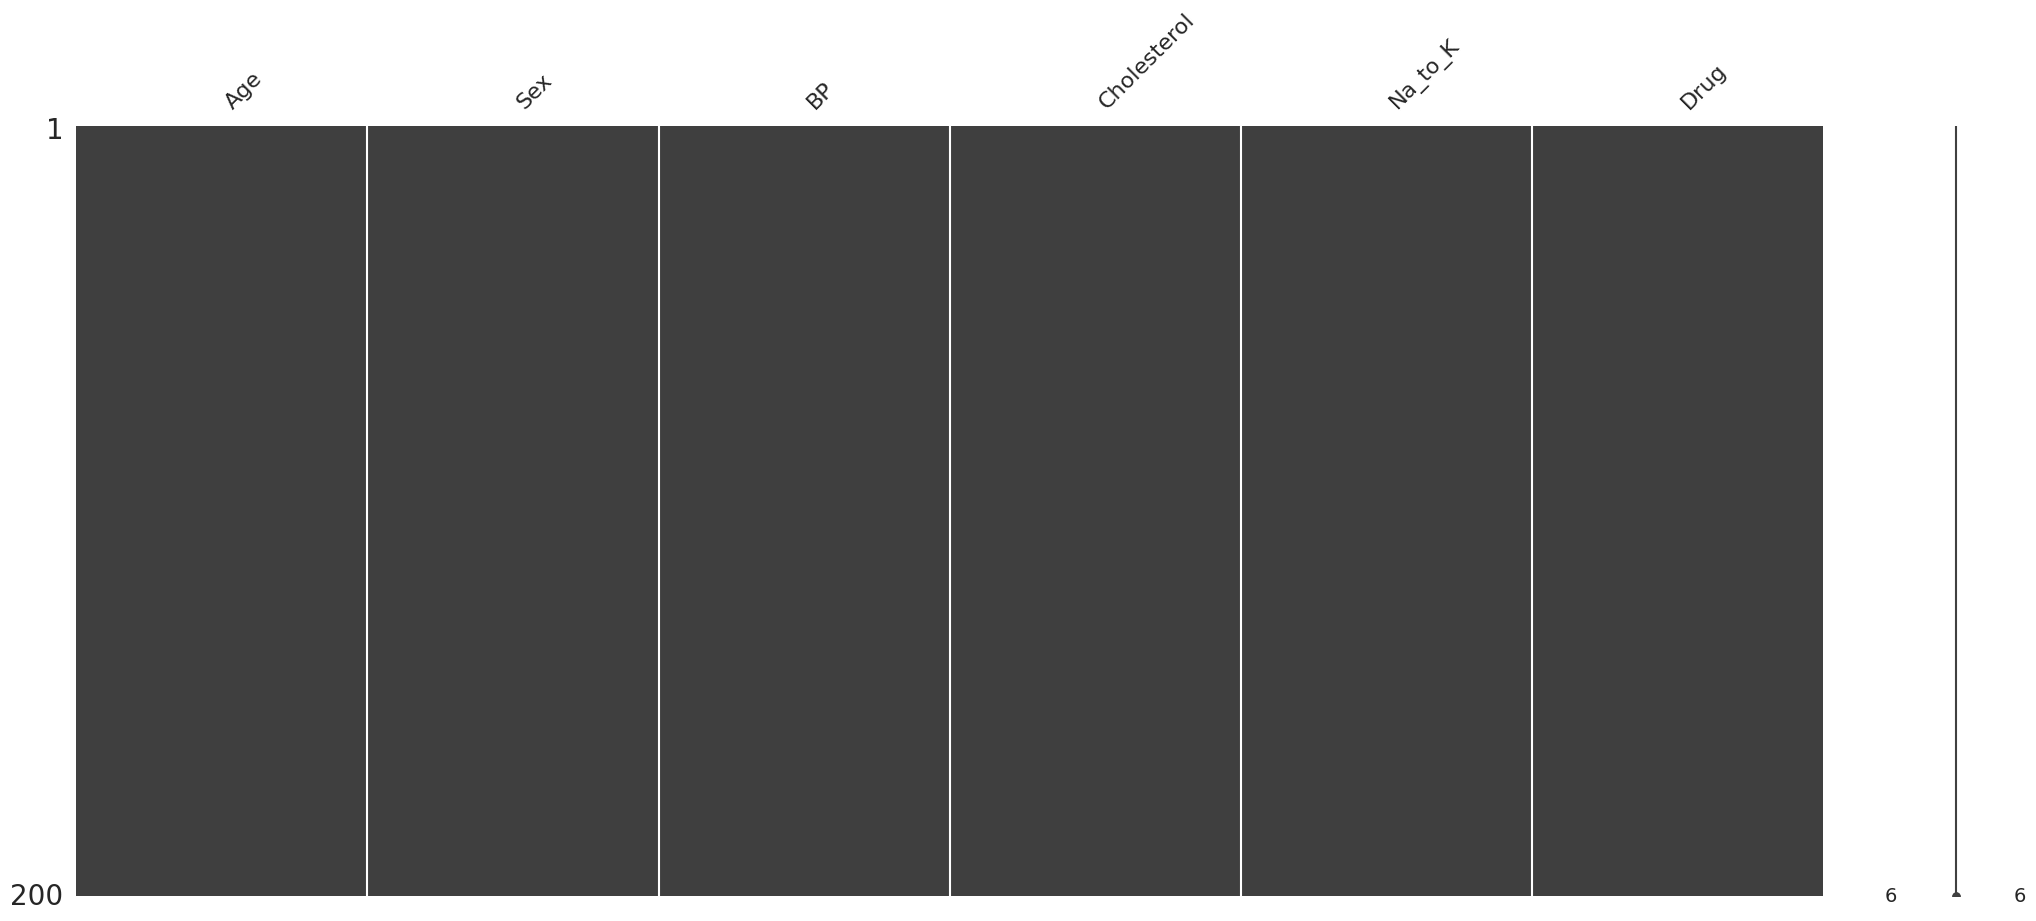

In [9]:
msno.matrix(Drug_data)
plt.show()

In [10]:
Drug_data.columns.to_list()

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

In [11]:
Age_col=Drug_data.Age.unique()
Age_col

array([23, 47, 28, 61, 22, 49, 41, 60, 43, 34, 74, 50, 16, 69, 32, 57, 63,
       48, 33, 31, 39, 45, 18, 65, 53, 46, 15, 73, 58, 66, 37, 68, 67, 62,
       24, 26, 40, 38, 29, 17, 54, 70, 36, 19, 64, 59, 51, 42, 56, 20, 72,
       35, 52, 55, 30, 21, 25])

In [12]:
Age_d=Drug_data.Age.value_counts()
Age_d

Age
47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: count, dtype: int64

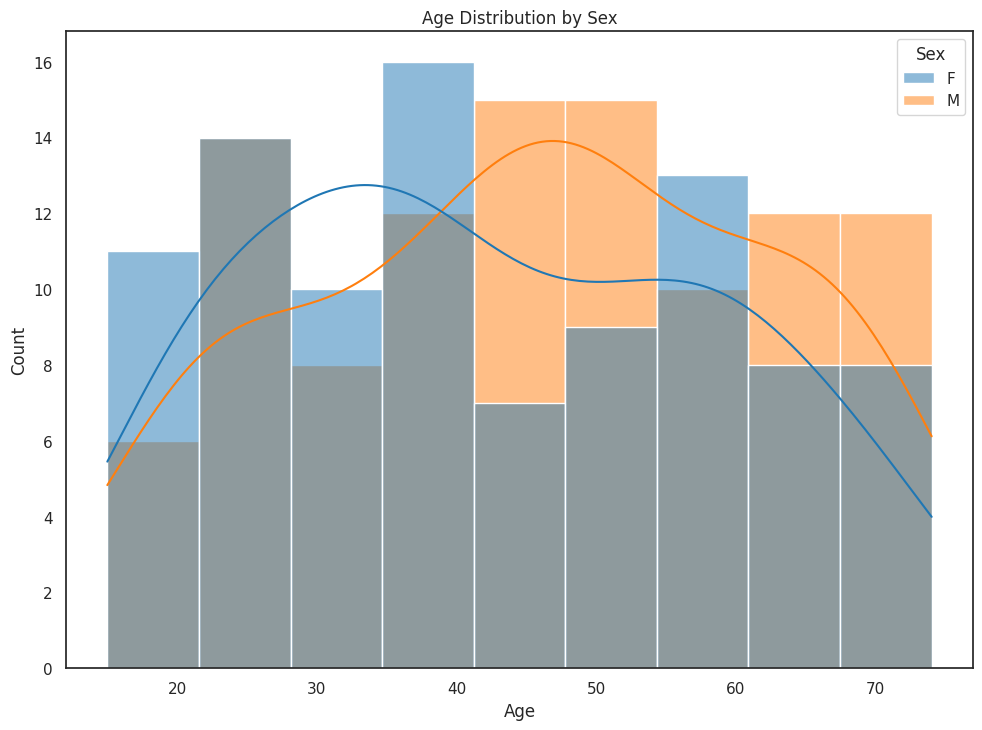

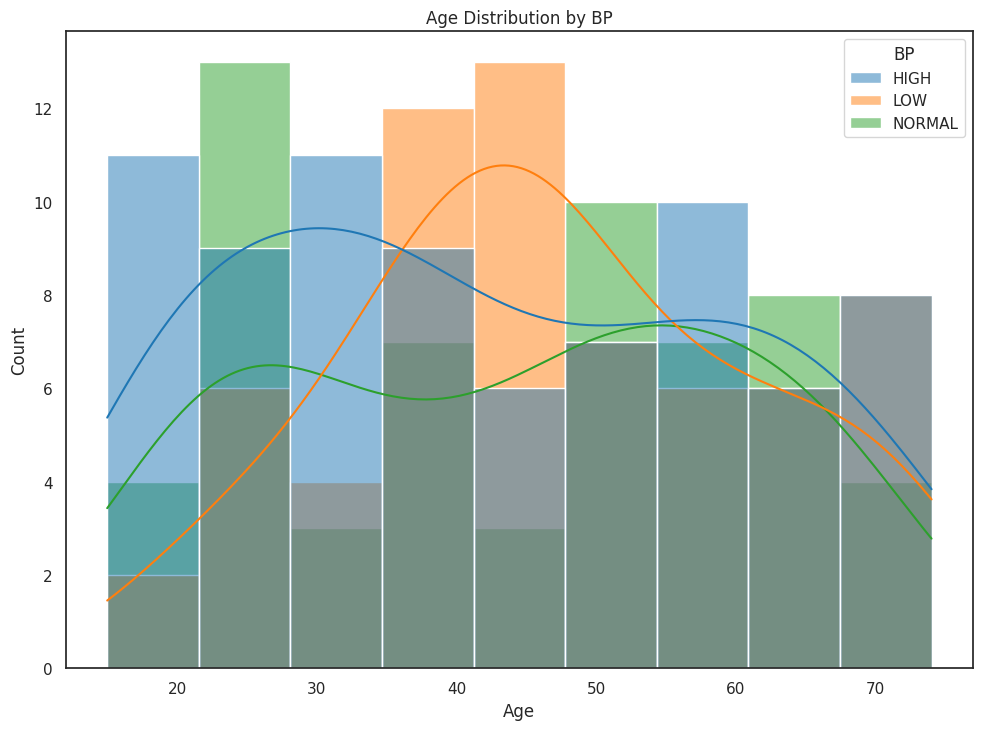

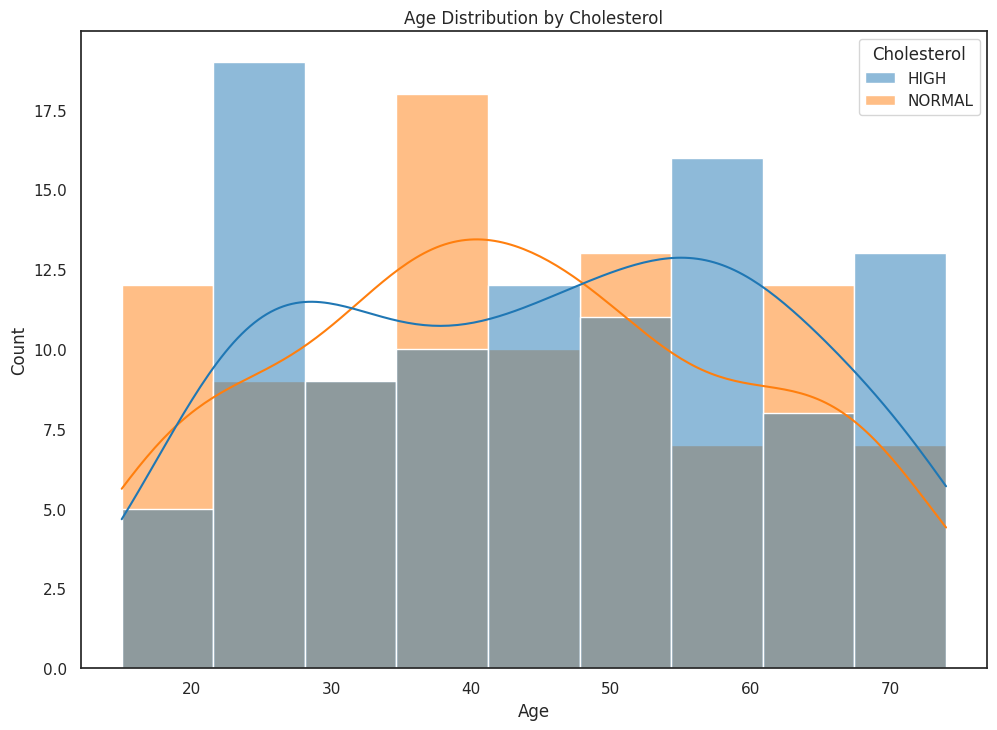

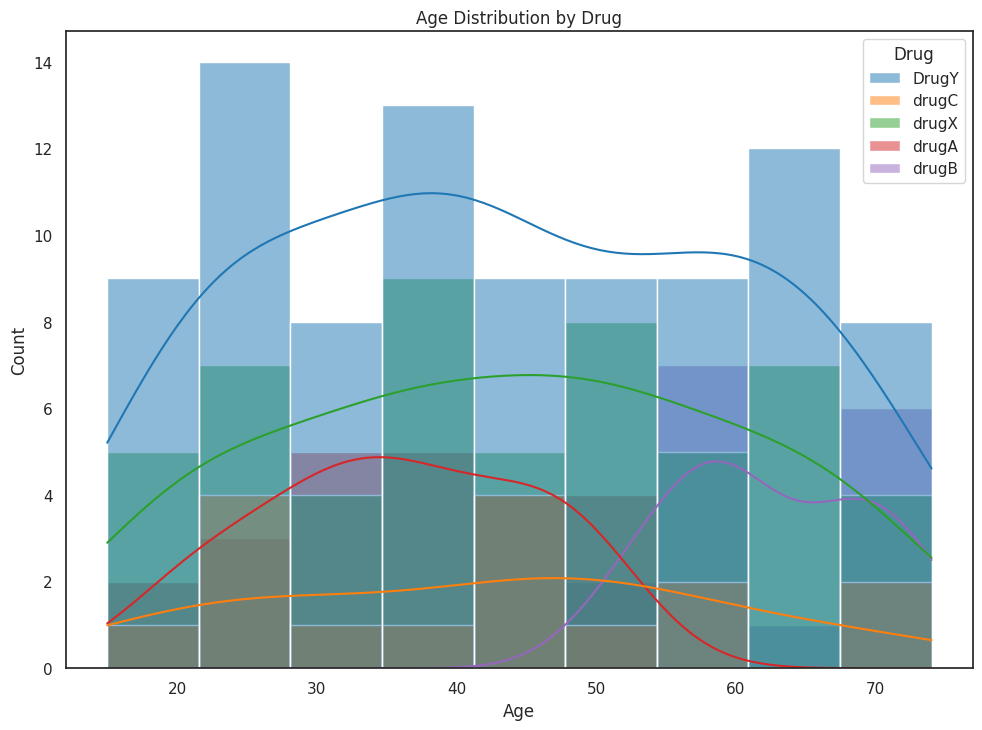

In [13]:
  for col in Drug_data.columns[1:]:
    if col != "Na_to_K" :      
        sns.histplot(data=Drug_data, x="Age", kde=True, hue=col)
        plt.title(f"Age Distribution by {col}")
        plt.show()

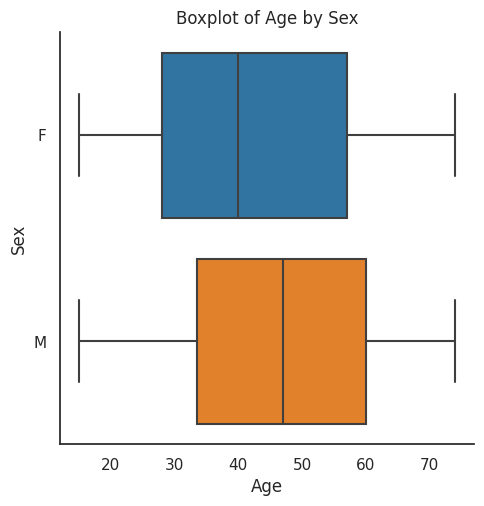

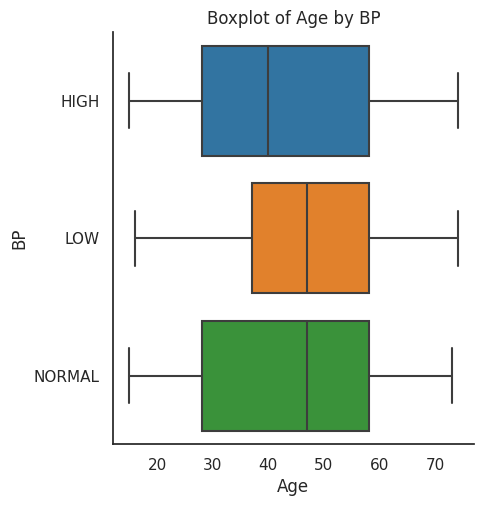

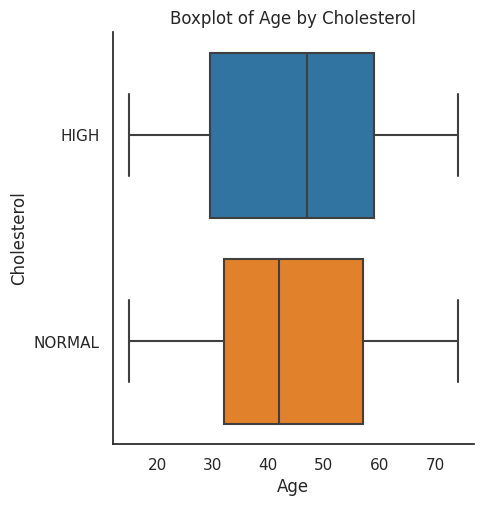

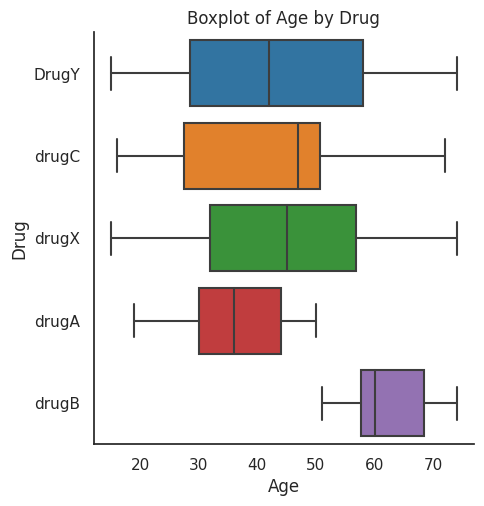

In [14]:
for col in Drug_data.columns[1:]:
    if col != "Na_to_K" :
        sns.catplot(data=Drug_data, x="Age", y=col, kind="box")
        plt.title(f"Boxplot of Age by {col}")
        plt.show()

In [15]:
Sex_col=Drug_data.Sex.value_counts()
Sex_col

Sex
M    104
F     96
Name: count, dtype: int64

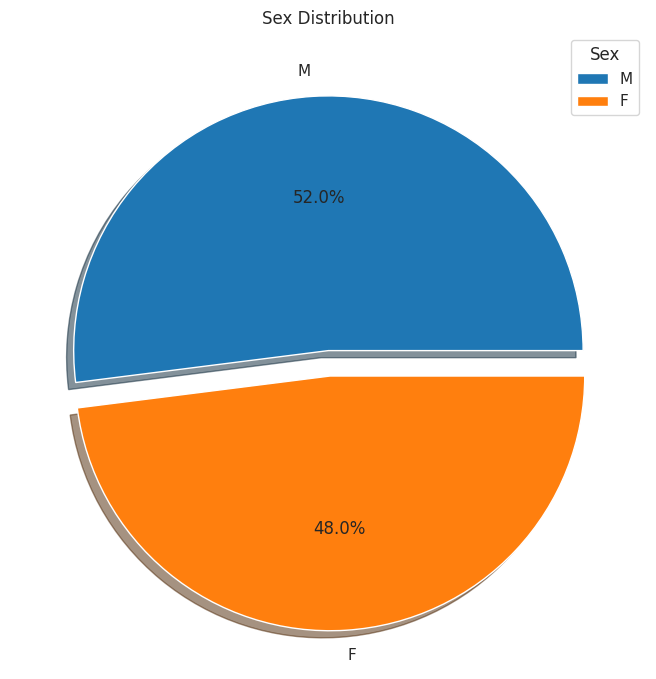

In [16]:
plt.pie(Sex_col.values, labels=Sex_col.index, autopct='%1.1f%%',shadow=True,explode=[0,.1])
plt.title("Sex Distribution")
plt.legend(title="Sex")
plt.show()

In [17]:
BP_col=Drug_data.BP.value_counts()
BP_col

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

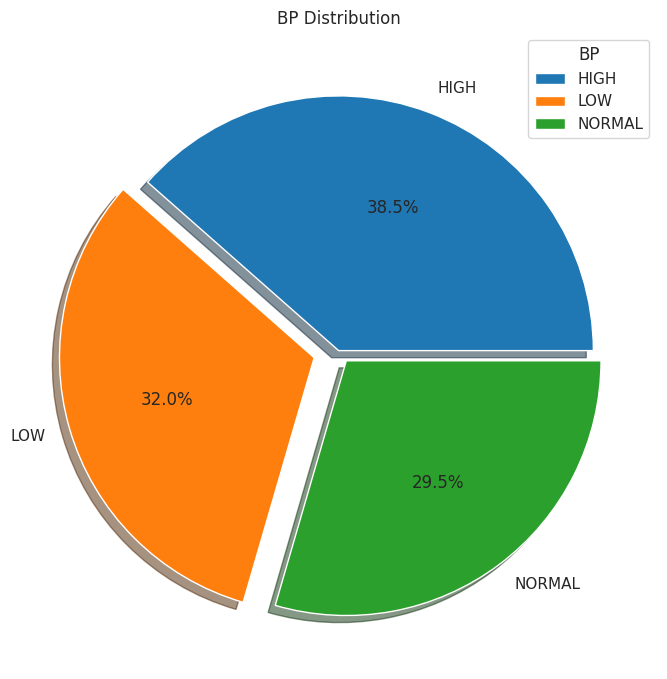

In [18]:
plt.pie(BP_col.values, labels=BP_col.index, autopct='%1.1f%%',shadow=True,explode=[0,.1,0.05])
plt.title("BP Distribution")
plt.legend(title="BP")
plt.show()

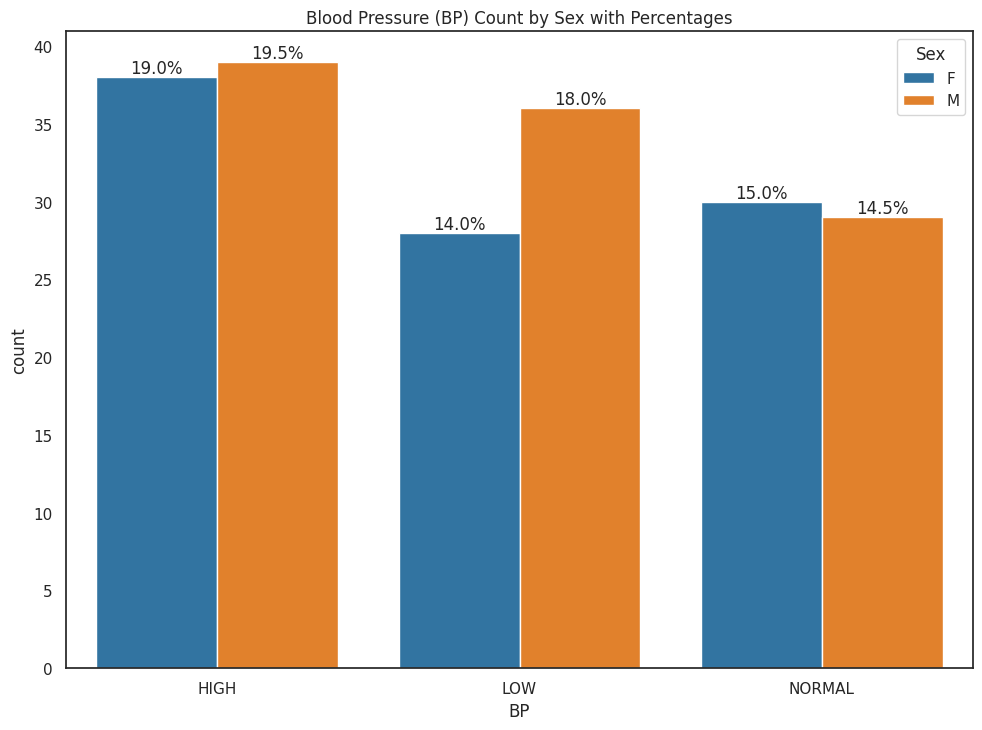

In [19]:
ax = sns.countplot(data=Drug_data, x="BP", hue="Sex")
total_counts = len(Drug_data)

for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total_counts
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title("Blood Pressure (BP) Count by Sex with Percentages")
plt.show()

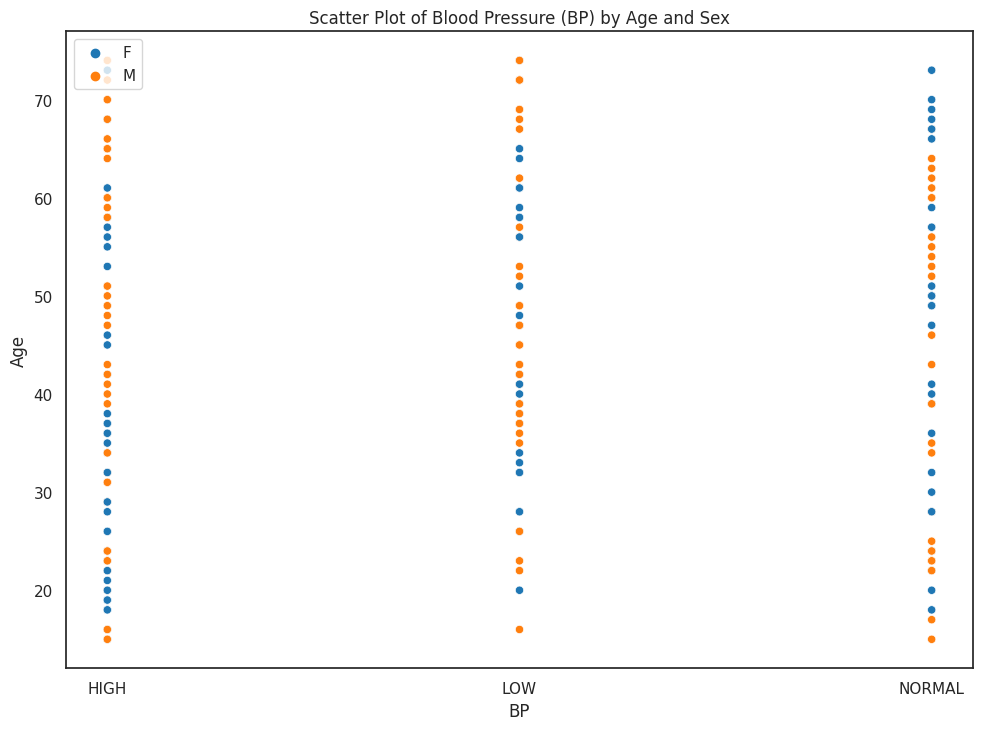

In [20]:
ax = sns.scatterplot(data=Drug_data, x="BP", y="Age", hue="Sex")
plt.title("Scatter Plot of Blood Pressure (BP) by Age and Sex")
plt.legend(loc="upper left")
plt.show()

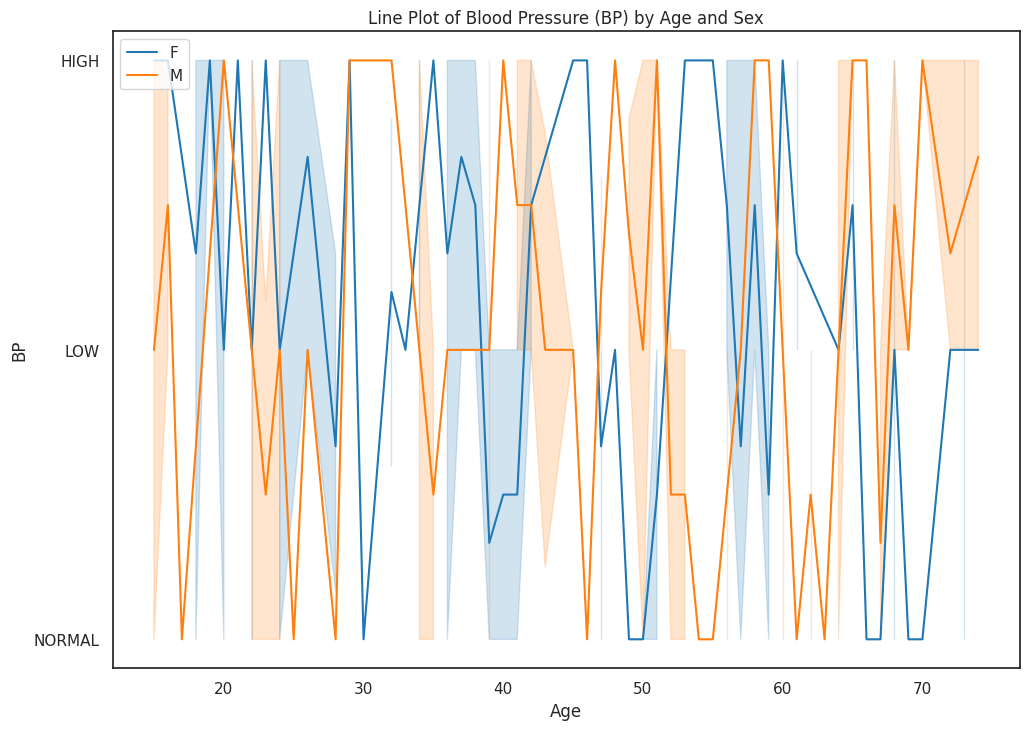

In [21]:
ax = sns.lineplot(data=Drug_data, y="BP", x="Age", hue="Sex")
plt.title("Line Plot of Blood Pressure (BP) by Age and Sex")
plt.legend(loc="upper left")
plt.show()

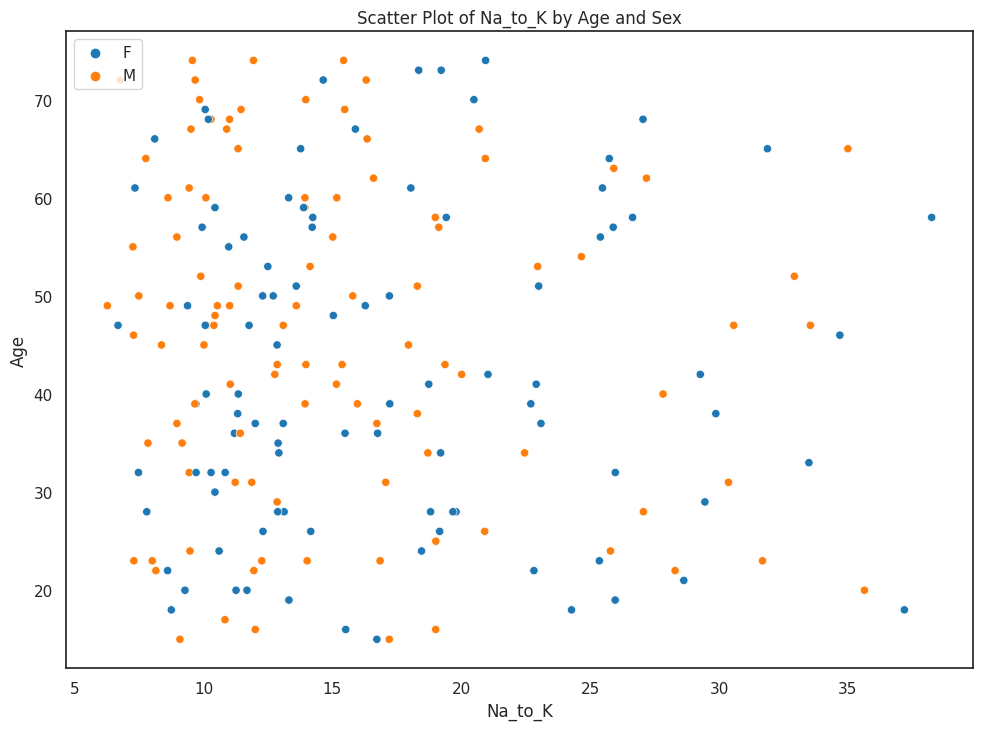

In [22]:
ax = sns.scatterplot(data=Drug_data, x="Na_to_K", y="Age", hue="Sex")
plt.title("Scatter Plot of Na_to_K by Age and Sex")
plt.legend(loc="upper left")
plt.show()

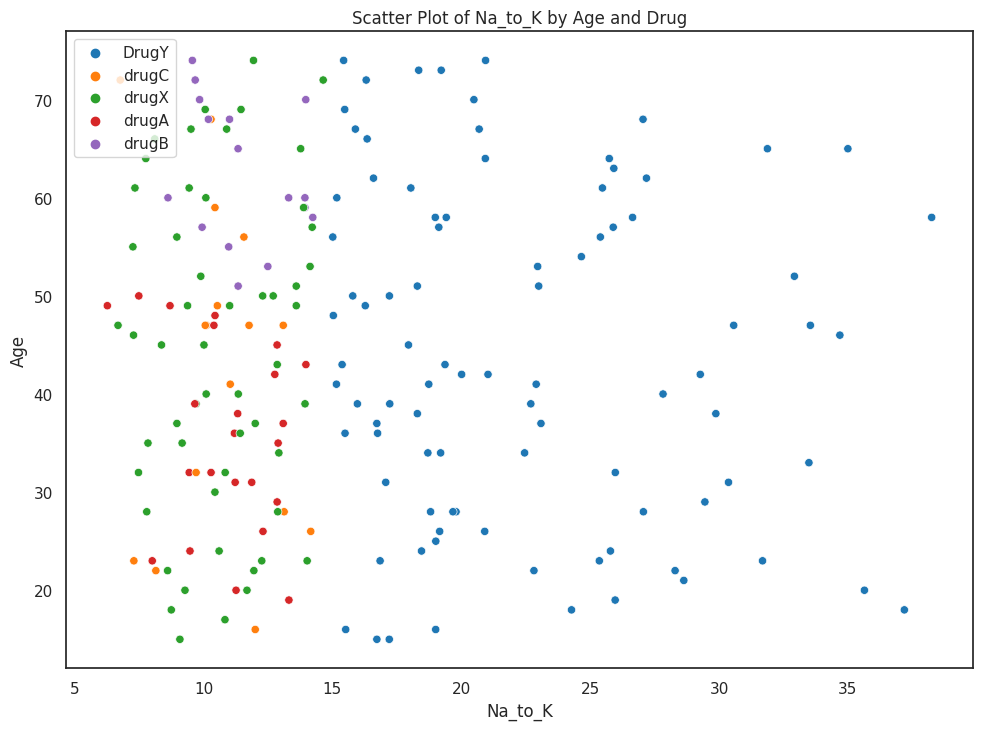

In [23]:
ax = sns.scatterplot(data=Drug_data, x="Na_to_K", y="Age", hue="Drug")
plt.title("Scatter Plot of Na_to_K by Age and Drug")
plt.legend(loc="upper left")
plt.show()

In [24]:
cho=Drug_data.Cholesterol.value_counts()
cho

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

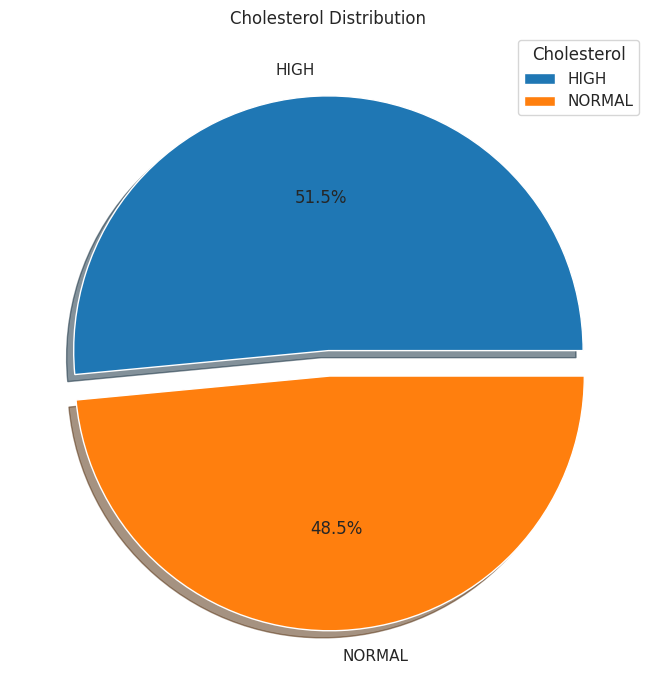

In [25]:
plt.pie(cho.values, labels=cho.index, autopct='%1.1f%%',shadow=True,explode=[0,.1])
plt.title("Cholesterol Distribution")
plt.legend(title="Cholesterol")
plt.show()

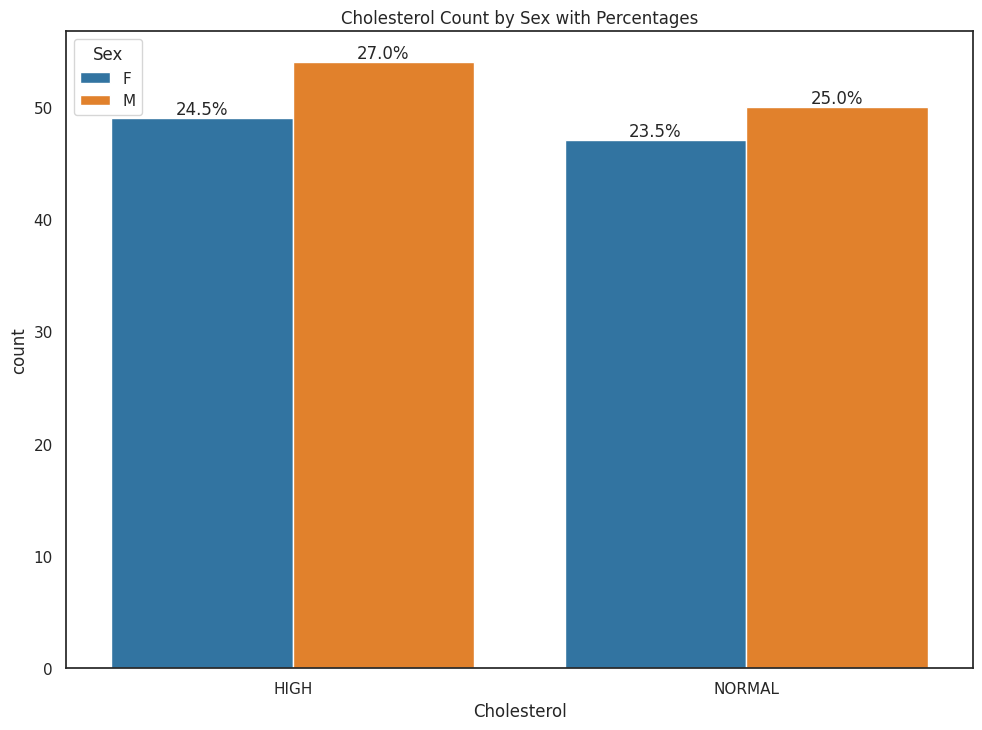

In [26]:
ax = sns.countplot(data=Drug_data, x="Cholesterol", hue="Sex")
total_counts = len(Drug_data)

for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total_counts
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title("Cholesterol Count by Sex with Percentages")
plt.show()

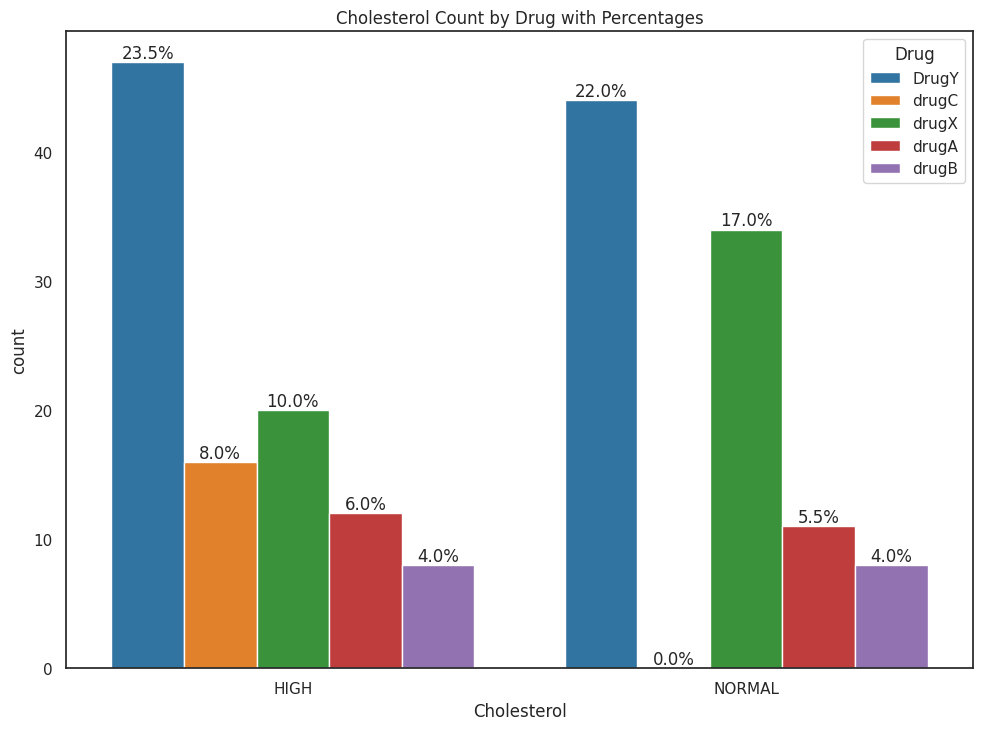

In [27]:
ax = sns.countplot(data=Drug_data, x="Cholesterol", hue="Drug")
total_counts = len(Drug_data)

for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total_counts
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title("Cholesterol Count by Drug with Percentages")
plt.show()

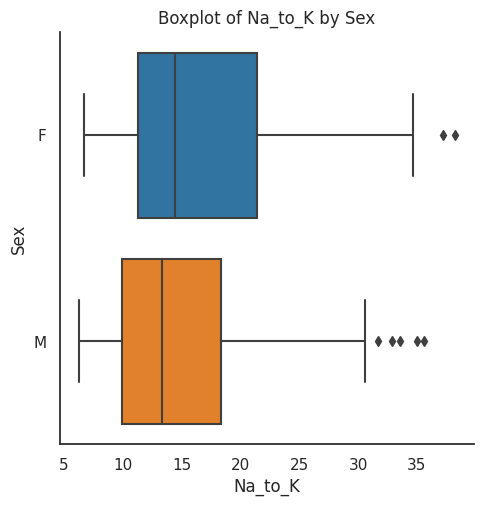

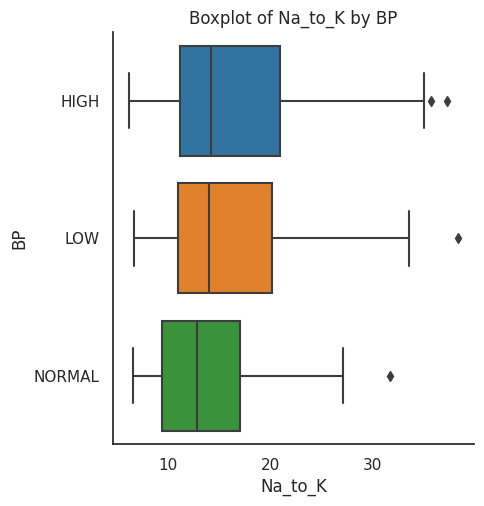

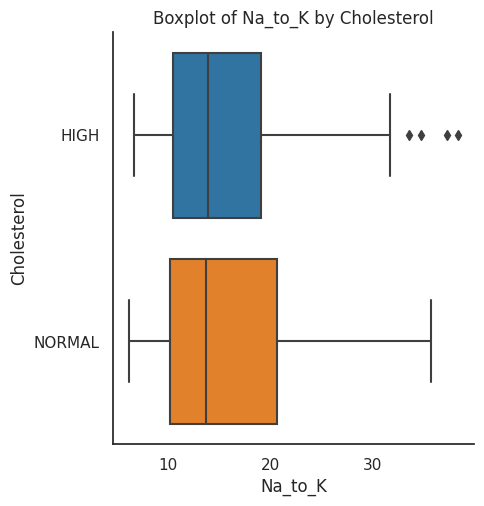

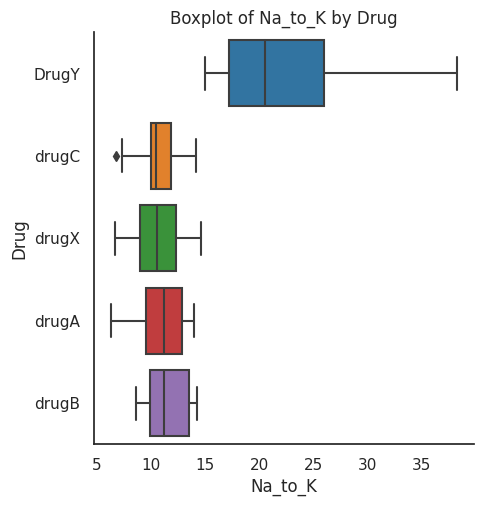

In [28]:
for col in Drug_data.columns[1:]:
    if col != "Na_to_K" :
        sns.catplot(data=Drug_data, x="Na_to_K", y=col, kind="box")
        plt.title(f"Boxplot of Na_to_K by {col}")
        plt.show()

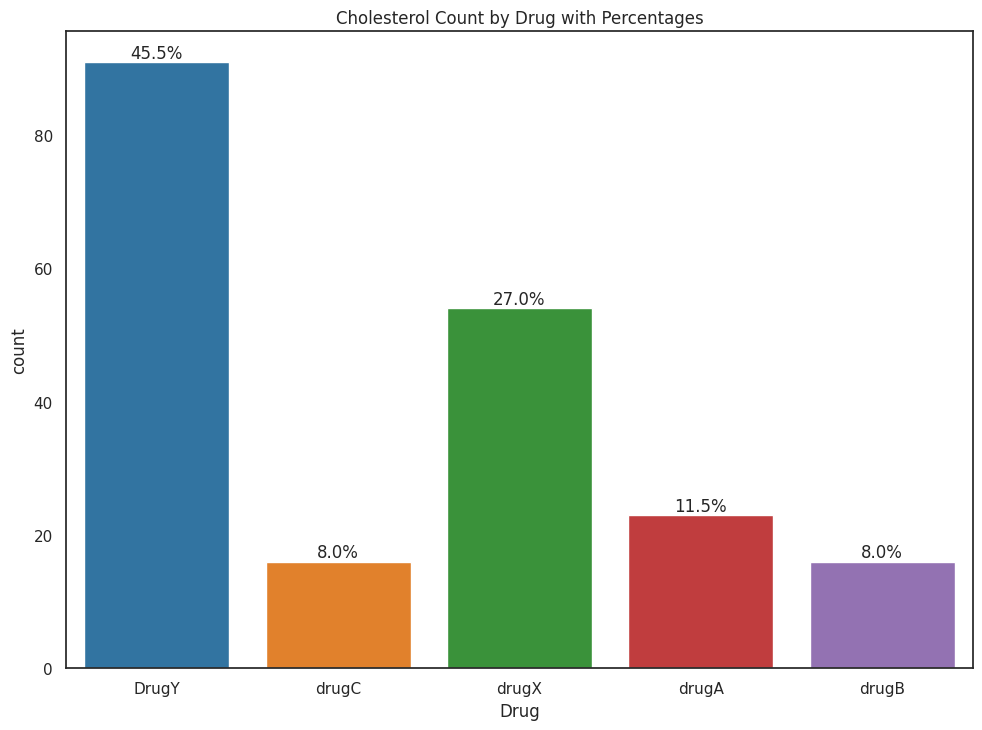

In [29]:
ax = sns.countplot(data=Drug_data, x="Drug")
total_counts = len(Drug_data)

for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total_counts
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title("Cholesterol Count by Drug with Percentages")
plt.show()

In [30]:
h=Drug_data.corr(numeric_only=True)
h

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


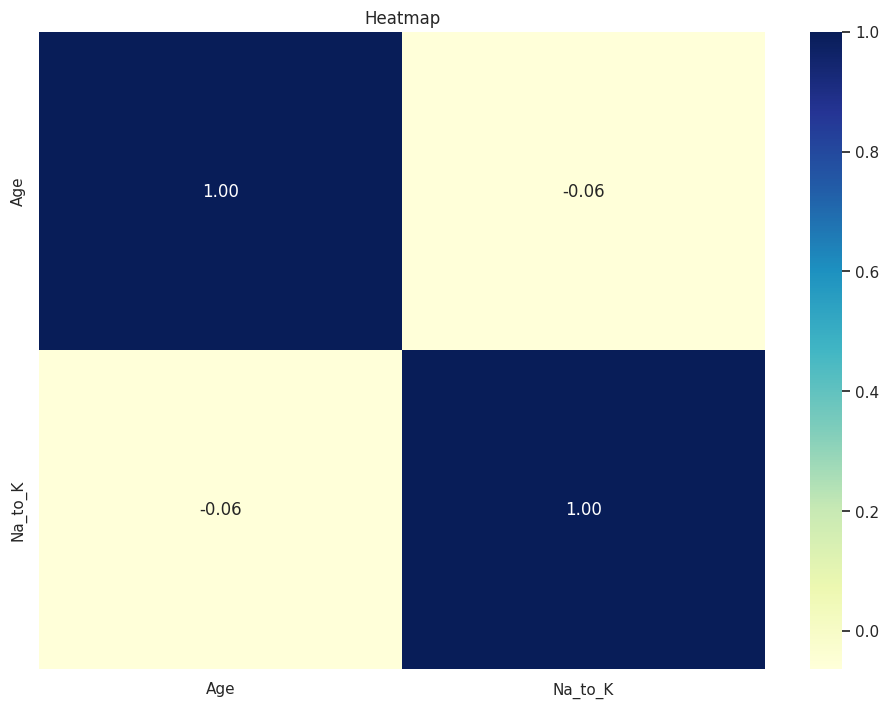

In [31]:
sns.heatmap(h, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap")
plt.show()

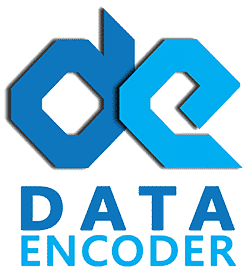

In [32]:
x=Drug_data.drop("Drug",axis=1)
y=Drug_data["Drug"]
y=pd.DataFrame(y)

In [33]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [34]:
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [35]:
Encoder=LabelEncoder()
x["Sex"]=Encoder.fit_transform(x["Sex"])
x["BP"]=Encoder.fit_transform(x["BP"])
x["Cholesterol"]=Encoder.fit_transform(x["Cholesterol"])
y=Encoder.fit_transform(y)
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [36]:
#encoder = OneHotEncoder(sparse=False)
#y = encoder.fit_transform(y)
#y = pd.DataFrame(y, columns=encoder.get_feature_names_out())

In [37]:
y=pd.DataFrame(y)
y

,0
0,0
1,3
2,3
3,4
4,0
...,...
195,3
196,3
197,4
198,4


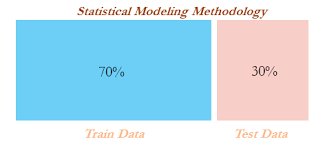

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
169,20,0,0,0,11.262
97,56,0,0,0,25.395
31,74,1,0,0,9.567
12,43,1,1,0,15.376
35,46,1,2,1,7.285
...,...,...,...,...,...
106,22,1,2,0,11.953
14,50,0,2,0,12.703
92,29,0,0,0,29.450
179,67,0,2,0,15.891


In [39]:
y_test

,0
95,4
15,0
30,4
158,3
128,0
115,0
69,0
170,4
174,1
45,4


# **ML Models**

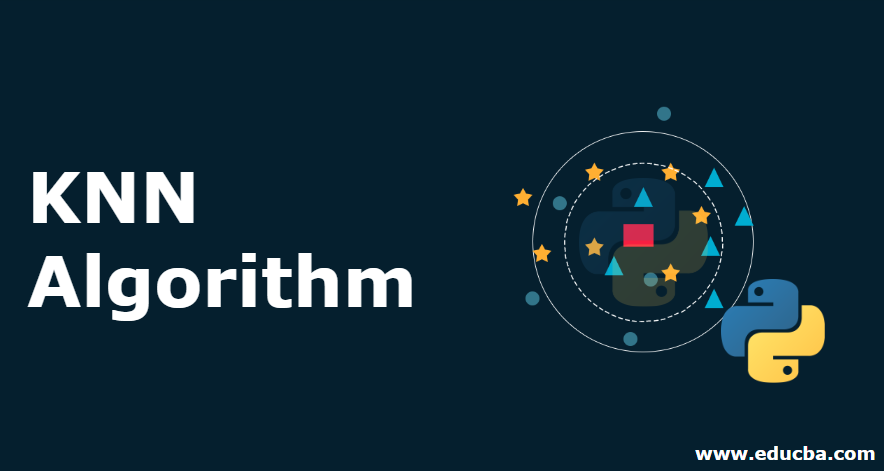

In [40]:
knn_classifier=KNeighborsClassifier(n_neighbors=12)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [41]:
y_pred=knn_classifier.predict(x_test)
y_pred

array([4, 0, 4, 2, 0, 0, 0, 1, 1, 4, 1, 4, 0, 4, 2, 0, 4, 4, 4, 0, 4, 4,
       4, 0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 2, 1, 0, 4, 4, 4, 4, 0,
       0, 2, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0])

In [42]:
y_pred=pd.DataFrame(y_pred) #,columns=["Drug_DrugY","Drug_drugA","Drug_drugB","Drug_drugC","Drug_drugX"]"""
y_pred

,0
0,4
1,0
2,4
3,2
4,0
5,0
6,0
7,1
8,1
9,4


In [43]:
accuracy_score(y_test,y_pred)*100

73.33333333333333

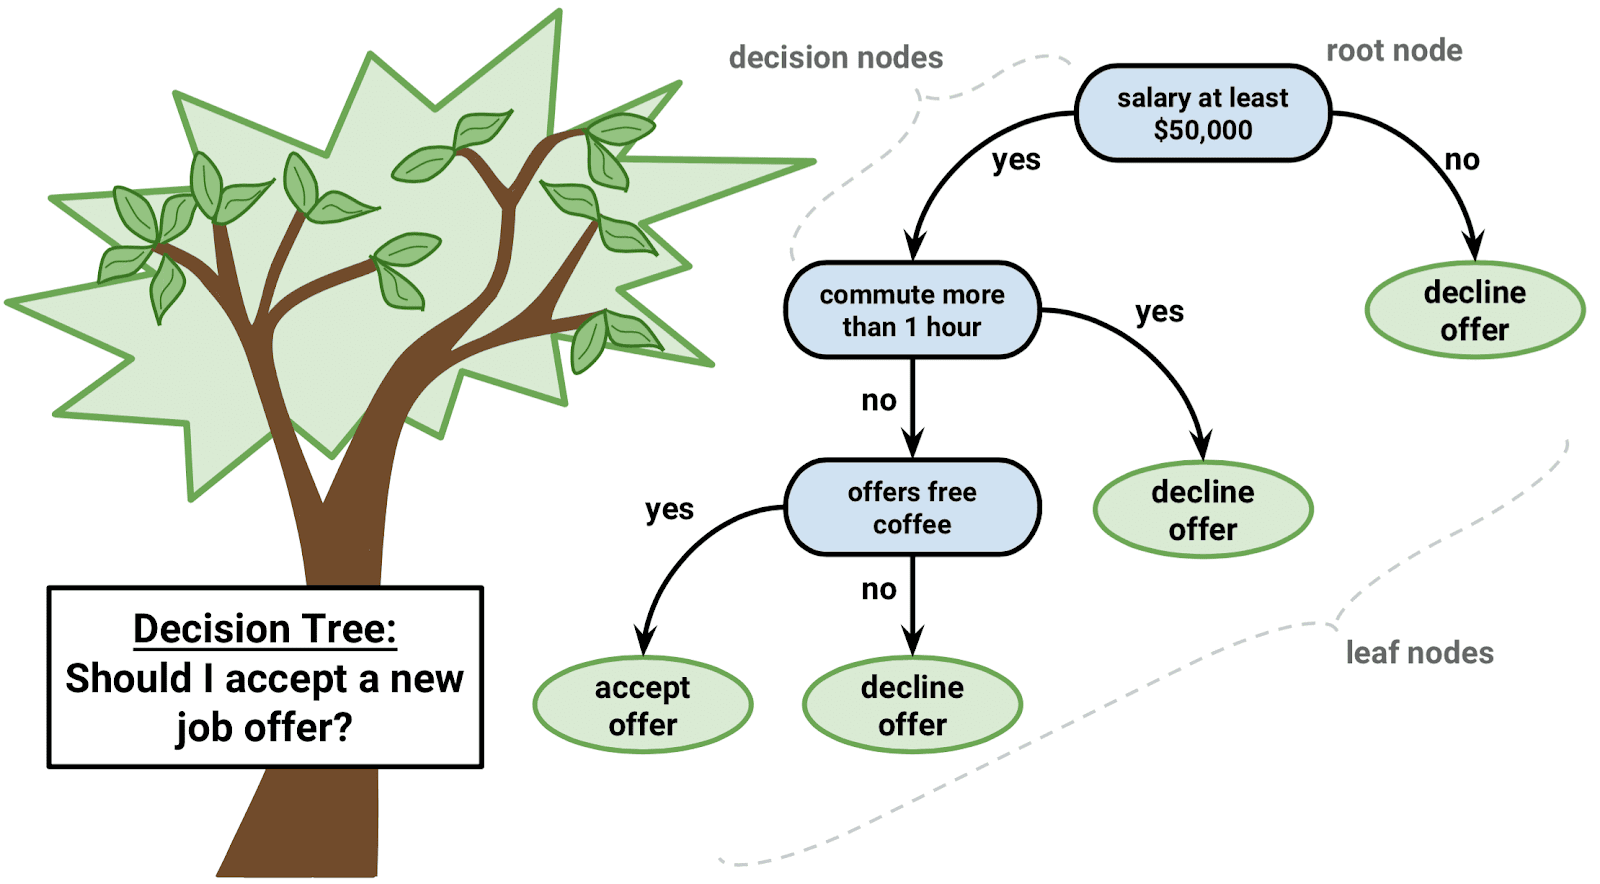

In [44]:
classifier=DecisionTreeClassifier(max_depth=10,max_features=4,criterion="entropy",random_state=42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=4,
                       random_state=42)

In [45]:
y_pred=knn_classifier.predict(x_test)
#y_pred=pd.DataFrame(y_pred,columns=["Drug_DrugY","Drug_drugA","Drug_drugB","Drug_drugC","Drug_drugX"])
y_pred

array([4, 0, 4, 2, 0, 0, 0, 1, 1, 4, 1, 4, 0, 4, 2, 0, 4, 4, 4, 0, 4, 4,
       4, 0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 2, 1, 0, 4, 4, 4, 4, 0,
       0, 2, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0])

In [46]:
accuracy_score(y_test,y_pred)*100

73.33333333333333

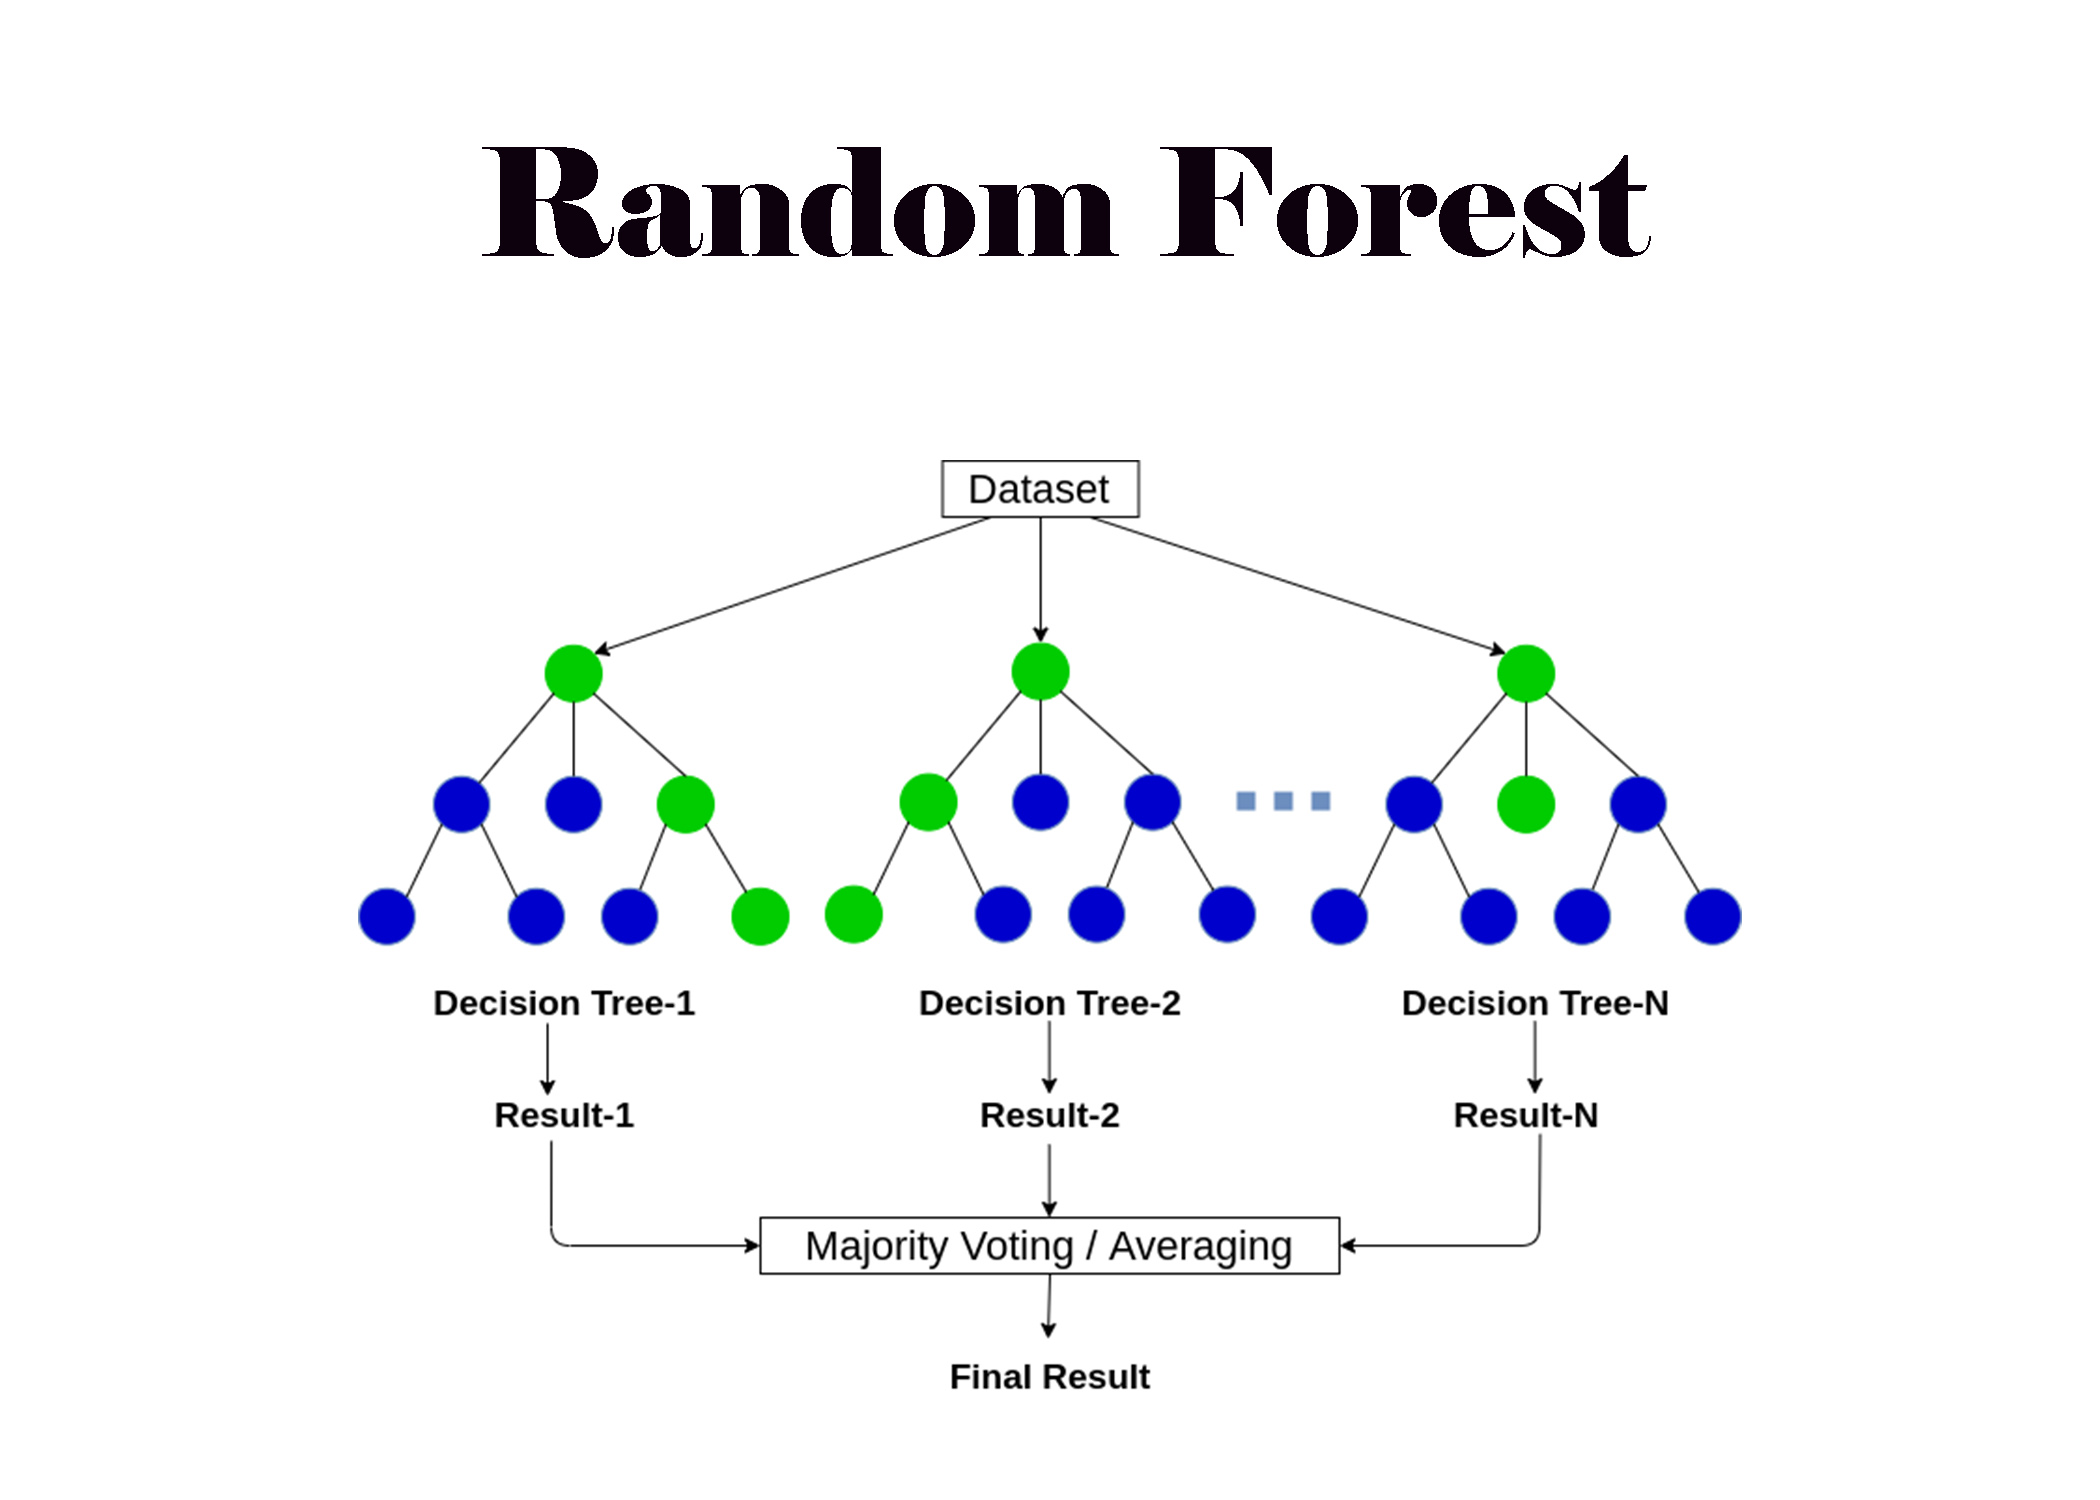

In [47]:
classifier=RandomForestClassifier(n_estimators=20,max_depth=10,random_state=42)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=42)

In [48]:
y_pred=knn_classifier.predict(x_test)
#y_pred=pd.DataFrame(y_pred,columns=["Drug_DrugY","Drug_drugA","Drug_drugB","Drug_drugC","Drug_drugX"])
y_pred

array([4, 0, 4, 2, 0, 0, 0, 1, 1, 4, 1, 4, 0, 4, 2, 0, 4, 4, 4, 0, 4, 4,
       4, 0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 2, 1, 0, 4, 4, 4, 4, 0,
       0, 2, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0])

In [49]:
accuracy_score(y_test,y_pred)*100

73.33333333333333